<a href="https://colab.research.google.com/github/dmusili/creditcardfrauddetection/blob/David/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
#read csv files
credit_card_df= pd.read_csv("creditcard.csv")

credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(credit_card_df.shape)
print(credit_card_df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [5]:
# determine value counts
credit_card_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Determine number of fraud cases in dataset
fraud = credit_card_df[credit_card_df['Class'] == 1]
valid = credit_card_df[credit_card_df['Class'] == 0]

In [7]:
# Print Fraud Amount statistics
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
# print valid amount statistics
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
# dividing the X and the Y from the dataset
X = credit_card_df.drop(['Class','Time'], axis = 1)
Y = credit_card_df["Class"]

print(X.head())
print(Y.head())

# (its a numpy array with no columns)
xValues = X.values
yValues = Y.values

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.0

In [10]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xValues, yValues, test_size = 0.2, random_state = 42)

In [11]:
#function for scaling dataset
from sklearn.preprocessing import MinMaxScaler
def scale_train_test(X_train,X_test):
    scaler=MinMaxScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_train_scaled=pd.DataFrame(X_train_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    X_test_scaled=scaler.transform(X_test)
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    return X_train_scaled,X_test_scaled

X_train_scaled, X_test_scaled=scale_train_test(xTrain, xTest)

In [12]:
# Initialize the classificators
logistic=LogisticRegression(solver='lbfgs', max_iter=1000 )
gradient=GradientBoostingClassifier(random_state=24)
adaboost = AdaBoostClassifier(random_state=24)


The traning accuracy of LogisticRegression is 0.9990783207882552
The test accuracy of LogisticRegression is 0.9989642217618764
[[   48    50]
 [    9 56855]]
              precision    recall  f1-score   support

           1       0.84      0.49      0.62        98
           0       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.92      0.74      0.81     56962
weighted avg       1.00      1.00      1.00     56962

The traning accuracy of GradientBoostingClassifier is 0.9991836555553117
The test accuracy of GradientBoostingClassifier is 0.9989466661985184
[[   59    39]
 [   21 56843]]
              precision    recall  f1-score   support

           1       0.74      0.60      0.66        98
           0       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

{'GradientBoos

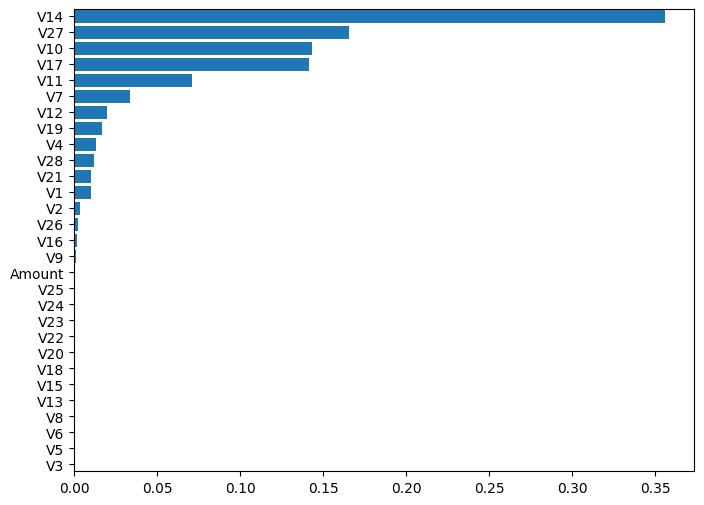

The traning accuracy of AdaBoostClassifier is 0.9993021571682503
The test accuracy of AdaBoostClassifier is 0.9992977774656788
[[   72    26]
 [   14 56850]]
              precision    recall  f1-score   support

           1       0.84      0.73      0.78        98
           0       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

{'AdaBoostClassifier'}
Model: AdaBoostClassifier Features


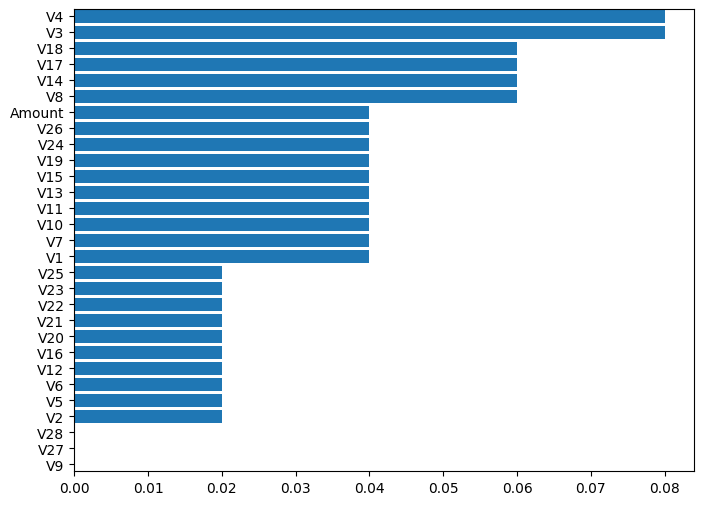

In [13]:
# Create a list with the objects
models= [logistic, gradient, adaboost]

#loop through each model
for model in models:
    #initialize
    y_pred=None
    accuracy=None

    # fit the model
    model.fit(X_train_scaled, yTrain)

    y_train_pred = model.predict(X_train_scaled)

    #predict on the test set
    y_pred= model.predict(X_test_scaled)

    #calculate accuraccy score
    accuracy= accuracy_score(yTest, y_pred)
    training_score=model.score(X_train_scaled, yTrain)


    # print accuracy score
    print(f"The traning accuracy of {type(model).__name__} is {training_score}")
    print(f"The test accuracy of {type(model).__name__} is {accuracy}")

    #Create a confusion matrix
    print(confusion_matrix(yTest, y_pred, labels = [1,0]))

    #Create a classificaiton report
    print(classification_report(yTest, y_pred,  labels = [1,0]))

    if ((model == gradient)  or (model == adaboost)):
      print({type(model).__name__})
      print(f"Model: {type(model).__name__} Features")

      # Get the feature importance array
      feature_importances = model.feature_importances_
      importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
      importances_sorted[:10]

      # Plot the feature importances
      features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
      cols = [f[0] for f in features]
      width = [f[1] for f in features]

      fig, ax = plt.subplots()

      fig.set_size_inches(8,6)
      plt.margins(y=0.001)

      ax.barh(y=cols, width=width)

      plt.show()


In [14]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_test_undersampled, y_test_undersampled = rus.fit_resample(X_test_scaled, yTest)



In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_scaled, yTrain)


In [16]:
#loop through each model
for model in models:
    #initialize
    y_pred=None
    accuracy=None

    # fit the model
    model.fit(X_train_oversampled, y_train_oversampled)

    #predict on the test set
    y_pred= model.predict(X_test_undersampled)

    clf_report= classification_report(y_test_undersampled, y_pred)
    print(f"The {type(model).__name__} training score is {model.score(X_train_oversampled,y_train_oversampled)}")
    print(f"The {type(model).__name__} testing score is {model.score(X_test_undersampled,y_test_undersampled)}")
    print(clf_report)
    print("\n")



The LogisticRegression training score is 0.9444781513380904
The LogisticRegression testing score is 0.9438775510204082
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        98
           1       0.98      0.91      0.94        98

    accuracy                           0.94       196
   macro avg       0.95      0.94      0.94       196
weighted avg       0.95      0.94      0.94       196



The GradientBoostingClassifier training score is 0.9952495262715926
The GradientBoostingClassifier testing score is 0.9540816326530612
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        98

    accuracy                           0.95       196
   macro avg       0.96      0.95      0.95       196
weighted avg       0.96      0.95      0.95       196



The AdaBoostClassifier training score is 0.9738361229451619
The AdaBoostClassifier testi

In [18]:
# Create a list with the objects
models= [logistic, gradient, adaboost]

#loop through each model
for model in models:
    #initialize
    y_pred=None
    accuracy=None

    # fit the model
    model.fit(X_train_oversampled, y_train_oversampled)

    #predict on the test set
    y_pred= model.predict(X_test_scaled)

    #y_pred_resampled = model_resampled.predict(X_test_scaled)

    #calculate accuraccy score
    accuracy= accuracy_score(yTest, y_pred)

    # print accuracy score
    print(f"The accuracy of {type(model).__name__} is {accuracy}")

    #Create a confusion matrix
    print(confusion_matrix(yTest, y_pred, labels = [1,0]))

    #Create a classificaiton report
    print(classification_report(yTest, y_pred,  labels = [1,0]))
   # print(classification_report(yTest, y_pred_resampled,  labels = [1,0]))

The accuracy of LogisticRegression is 0.9780906569291808
[[   89     9]
 [ 1239 55625]]
              precision    recall  f1-score   support

           1       0.07      0.91      0.12        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

The accuracy of GradientBoostingClassifier is 0.9928197745865665
[[   90     8]
 [  401 56463]]
              precision    recall  f1-score   support

           1       0.18      0.92      0.31        98
           0       1.00      0.99      1.00     56864

    accuracy                           0.99     56962
   macro avg       0.59      0.96      0.65     56962
weighted avg       1.00      0.99      1.00     56962

The accuracy of AdaBoostClassifier is 0.9816368807275025
[[   90     8]
 [ 1038 55826]]
              precision    recall  f1-score   support

           1       

In [19]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_scaled, yTrain)
#y_resampled.value_counts()

In [20]:
# Create a list with the objects
models= [logistic, gradient, adaboost]

#loop through each model
for model in models:
    #initialize
    y_pred=None
    accuracy=None

    # fit the model
    model.fit(X_resampled, y_resampled)

    #predict on the test set
    y_pred= model.predict(X_test_scaled)

    #calculate accuraccy score
    accuracy= accuracy_score(yTest, y_pred)

    #print model name
    print(f"Model: {type(model).__name__} (SMOTE)")

    # print accuracy score
    print(f"The accuracy of {type(model).__name__} is {accuracy}")

    #Create a confusion matrix
    print(confusion_matrix(yTest, y_pred, labels = [1,0]))

    #Create a classificaiton report
    print(classification_report(yTest, y_pred,  labels = [1,0]))

Model: LogisticRegression (SMOTE)
The accuracy of LogisticRegression is 0.9768266563674028
[[   89     9]
 [ 1311 55553]]
              precision    recall  f1-score   support

           1       0.06      0.91      0.12        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Model: GradientBoostingClassifier (SMOTE)
The accuracy of GradientBoostingClassifier is 0.9884133281837014
[[   90     8]
 [  652 56212]]
              precision    recall  f1-score   support

           1       0.12      0.92      0.21        98
           0       1.00      0.99      0.99     56864

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Model: AdaBoostClassifier (SMOTE)
The accuracy of AdaBoostClassifier is 0.974316210807

In [21]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled=None
y_resampled=None

X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, yTrain)

In [22]:
# Create a list with the objects
models= [logistic, gradient, adaboost]

#loop through each model
for model in models:
    #initialize
    y_pred=None
    accuracy=None

    # fit the model
    model.fit(X_resampled, y_resampled)

    #predict on the test set
    y_pred= model.predict(X_test_scaled)

    #calculate accuraccy score
    accuracy= accuracy_score(yTest, y_pred)

    #print model name
    print(f"Model: {type(model).__name__} (SMOTEENN)")

    # print accuracy score
    print(f"The accuracy of {type(model).__name__} is {accuracy}")

    #Create a confusion matrix
    print(confusion_matrix(yTest, y_pred, labels = [1,0]))

    #Create a classificaiton report
    print(classification_report(yTest, y_pred,  labels = [1,0]))

Model: LogisticRegression (SMOTEENN)
The accuracy of LogisticRegression is 0.9760191004529335
[[   89     9]
 [ 1357 55507]]
              precision    recall  f1-score   support

           1       0.06      0.91      0.12        98
           0       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Model: GradientBoostingClassifier (SMOTEENN)
The accuracy of GradientBoostingClassifier is 0.9883782170569854
[[   90     8]
 [  654 56210]]
              precision    recall  f1-score   support

           1       0.12      0.92      0.21        98
           0       1.00      0.99      0.99     56864

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Model: AdaBoostClassifier (SMOTEENN)
The accuracy of AdaBoostClassifier is 0.976